In [74]:
## pip install pymdptoolbox, tqdm, gym
import gym
import numpy as np
import mdptoolbox, mdptoolbox.example
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import pandas as pd
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
## credit to https://www.kaggle.com/code/benjaminschreiber/markov-decision-processes/notebook
##https://www.kaggle.com/code/arjunayyangar/assignment4-1-frozen-lake/notebook

In [75]:
np.random.seed(10)
twenty = generate_random_map(20)
MAPS = {
    "20x20": twenty
}
MAPS

{'20x20': ['SFFFFFFFFFFHFFHFFFHF',
  'FFFFFFFFFFHFHFFFFHFF',
  'FHFHFFFHFFFFHFFHHFHF',
  'FHFFFFFFFFFFFFFFHFHF',
  'FFFFFFFFFFFFFHFFHFFF',
  'FHFFFFFFFFFFFFFFFFHF',
  'FFFFFFFFFFFFFFHHFFFH',
  'FFFHFFFFFFFFFHFHFFFF',
  'FFFFFFFFHFFHFFFFFFFF',
  'FHFFHFFFFFFFFFFFFHFF',
  'HFFHFFHFFFFHHFHFFFFF',
  'FHFFHFFHFFFFHFFFFFFH',
  'FFFFFHFFHFFFHFHFFFHF',
  'FFFHFFFHHHHFHFFFFFFF',
  'FFHHFFHFFFFFFFHHFFFF',
  'FFHFFFFFFFFFFFHHFFFF',
  'HFFFFFFHFFFFFFFHFFFH',
  'FFFHFFFFFHFHFHFFFHHF',
  'FFFFFFFFFFFFFFFFFFFF',
  'FFFHFFFFFFFFFFFHFHFG']}

In [76]:
env = FrozenLakeEnv(desc=MAPS["20x20"])
env.reset()
#Credit Blake Wang CS7641 @709_f1
nA, nS = 4, 400
P_fl = np.zeros([nA, nS, nS])
R_fl = np.zeros([nS, nA])
for s in range(nS):
    for a in range(nA):
        transitions = env.P[s][a]
        for p_trans, next_s, reward, _ in transitions:
            P_fl[a,s,next_s] += p_trans
            R_fl[s,a] = reward
        P_fl[a,s,:] /= np.sum(P_fl[a,s,:])

In [77]:
env.desc

array([[b'S', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
        b'H', b'F', b'F', b'H', b'F', b'F', b'F', b'H', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'H',
        b'F', b'H', b'F', b'F', b'F', b'F', b'H', b'F', b'F'],
       [b'F', b'H', b'F', b'H', b'F', b'F', b'F', b'H', b'F', b'F', b'F',
        b'F', b'H', b'F', b'F', b'H', b'H', b'F', b'H', b'F'],
       [b'F', b'H', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
        b'F', b'F', b'F', b'F', b'F', b'H', b'F', b'H', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
        b'F', b'F', b'H', b'F', b'F', b'H', b'F', b'F', b'F'],
       [b'F', b'H', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
        b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'H', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
        b'F', b'F', b'F', b'H', b'H', b'F', b'F', b'F', b'H'],
       [b'F', b'F', b'F', b'H', b'F', b'F

In [78]:
env.render()

In [79]:
## Policy iteration: tuning on Gamma
n = 50
value_f = [0]*n
policy = [0]*n
iters = [0]*n
time_array = [0]*n
gamma_arr = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.PolicyIteration(P_fl, R_fl, (i+0.99)/n)
    pi.run()
    gamma_arr[i]=(i+0.99)/n
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time





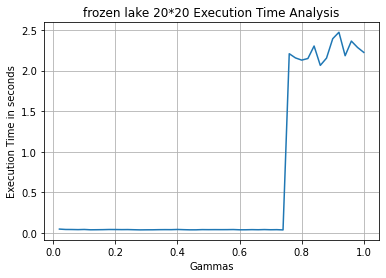

In [80]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('frozen lake 20*20 Execution Time Analysis')
plt.ylabel('Execution Time in seconds')
plt.grid()

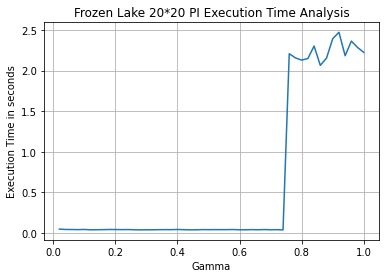

In [81]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gamma')
plt.title('Frozen Lake 20*20 PI Execution Time Analysis')
plt.ylabel('Execution Time in seconds')
plt.grid()


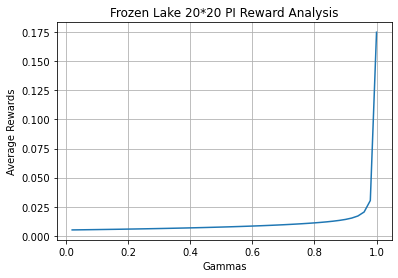

In [82]:
plt.plot(gamma_arr,value_f)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 PI Reward Analysis')
plt.grid()

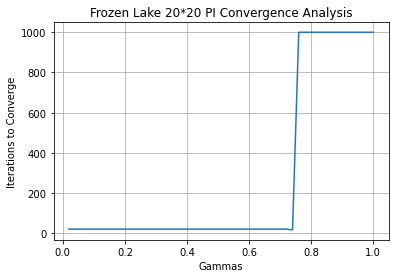

In [83]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake 20*20 PI Convergence Analysis')
plt.grid()

In [ ]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 3,epsilon=0.1,epsilon_decay=0.999, n_iter=10000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "small frozen lake Iteration vs Mean Reward", figure_size=(6,4))

In [84]:
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var)
    plt.show()
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

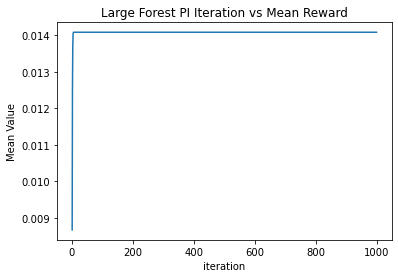

In [85]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.PolicyIteration(P_fl, R_fl, 0.9)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Large Forest PI Iteration vs Mean Reward", figure_size=(6,4))

In [69]:
pi_results

{'Mean V': [0.0086734693877551,
  0.01255169793120123,
  0.013687842823740462,
  0.014041429482335673,
  0.014082350927245434,
  0.014085471828584049,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.014085472426880288,
  0.01408

VALUE ITERATION WITH Frozen Lake 20*20 


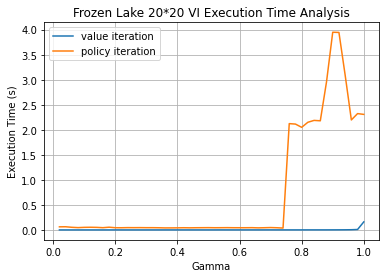

In [14]:
print('VALUE ITERATION WITH Frozen Lake 20*20 ')
## value iteration tuning on gamma
n = 50 
value_f2 = [0]*n
policy2 = [0]*n
iters2 = [0]*n
time_array2 = [0]*n
gamma_arr2 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.ValueIteration(P_fl, R_fl, (i+0.99)/n)
    pi.run()
    gamma_arr2[i]=(i+0.99)/n
    value_f2[i] = np.mean(pi.V)
    policy2[i] = pi.policy
    iters2[i] = pi.iter
    time_array2[i] = pi.time


plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')

plt.xlabel('Gamma')
plt.title('Frozen Lake 20*20 VI Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

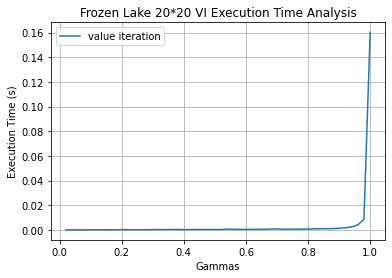

In [15]:
plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.xlabel('Gammas')
plt.title('Frozen Lake 20*20 VI Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

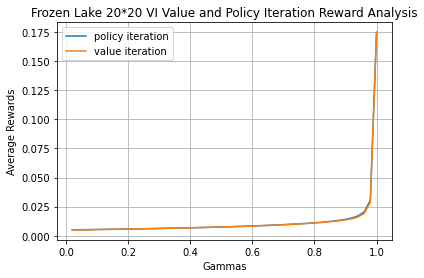

In [16]:
plt.plot(gamma_arr,value_f, label = 'policy iteration')
plt.plot(gamma_arr2,value_f2, label = 'value iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 VI Value and Policy Iteration Reward Analysis')
plt.grid()
plt.legend()


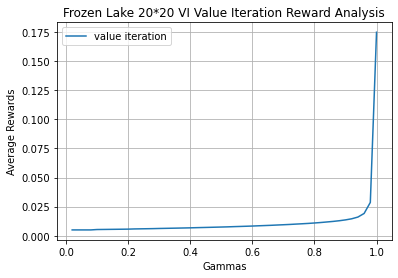

In [17]:
plt.plot(gamma_arr2,value_f2, label = 'value iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 VI Value Iteration Reward Analysis')
plt.grid()
plt.legend()

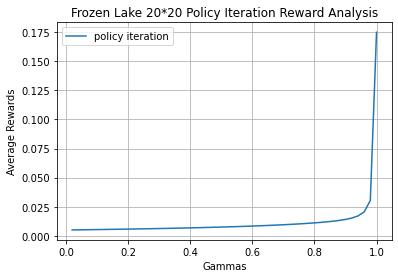

In [18]:
plt.plot(gamma_arr,value_f, label = 'policy iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 Policy Iteration Reward Analysis')
plt.grid()
plt.legend()

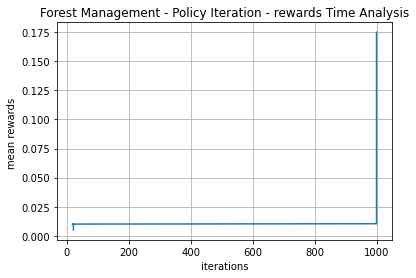

In [58]:
plt.plot(iters, value_f)
plt.xlabel('iterations')
plt.title('Forest Management - Policy Iteration - rewards Time Analysis')
plt.ylabel('mean rewards ')
plt.grid()

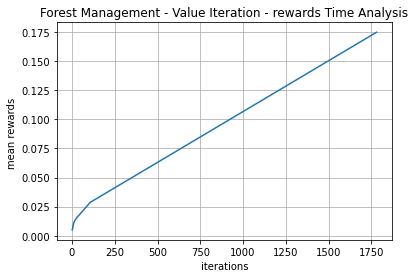

In [59]:
plt.plot(iters2, value_f2)
plt.xlabel('iterations')
plt.title('Forest Management - Value Iteration - rewards Time Analysis')
plt.ylabel('mean rewards ')
plt.grid()

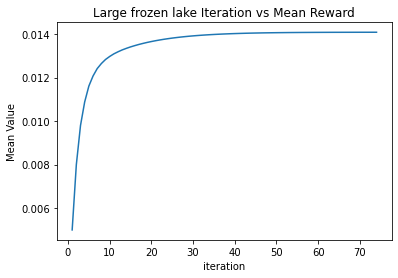

In [72]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.ValueIteration(P_fl, R_fl, 0.9, 0.00001)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Large frozen lake Iteration vs Mean Reward", figure_size=(6,4))

In [73]:
pi_results

{'Mean V': [0.005,
  0.008,
  0.0098,
  0.01088,
  0.011609000000000001,
  0.0120707,
  0.0124115075,
  0.012644969749999997,
  0.012831958249999999,
  0.012971264682499999,
  0.0130907208095,
  0.01318622961455,
  0.013271975405562497,
  0.013343973570779748,
  0.013410250748991801,
  0.013468445222820782,
  0.013522854973979044,
  0.013571157153662822,
  0.013616410731986963,
  0.013656833810896774,
  0.013694676111715709,
  0.01372859612874823,
  0.013760301154161055,
  0.013788774789449128,
  0.013815344825541474,
  0.013839231534982267,
  0.013861484973492759,
  0.013881500375058874,
  0.013900116934303286,
  0.013916862376473825,
  0.013932411506710516,
  0.013946394627267027,
  0.01395935858723669,
  0.013971014745983543,
  0.013981803740983187,
  0.013991499903412127,
  0.01400045851166086,
  0.014008504580316262,
  0.014015924401376676,
  0.014022583508948784,
  0.014028712314675918,
  0.014034208381653535,
  0.014039256825174661,
  0.014043780328074988,
  0.014047927316830244

Q_learning WITH Frozen lake


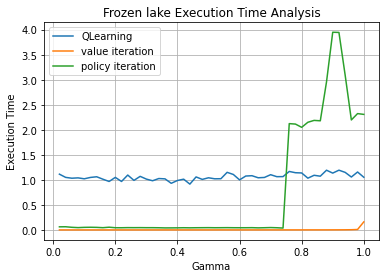

In [19]:
## Q learning tuning on Gamma
print('Q_learning WITH Frozen lake')
n = 50 
value_f3 = [0]*n
policy3 = [0]*n
time_array3 = [0]*n
gamma_arr3 = [0] * n
iters3 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.QLearning(P_fl, R_fl, (i+0.99)/n)
    pi.run()
    gamma_arr3[i]=(i+0.99)/n
    value_f3[i] = np.mean(pi.V)
    policy3[i] = pi.policy
    time_array3[i] = pi.time

plt.plot(gamma_arr3, time_array3, label = 'QLearning')
plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')
plt.xlabel('Gamma')
plt.title('Frozen lake 20*20 Execution Time Analysis')
plt.ylabel('Execution Time')
plt.legend()
plt.grid()

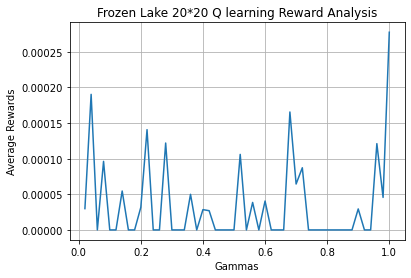

In [20]:
plt.plot(gamma_arr3,value_f3)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 Q learning Reward Analysis')
plt.grid()

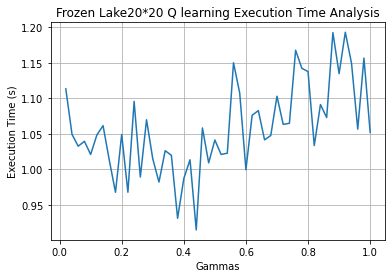

In [21]:
plt.plot(gamma_arr3, time_array3, label = 'Q Learning')
plt.xlabel('Gammas')
plt.ylabel('Execution Time (s)')
plt.title('Frozen Lake20*20 Q learning Execution Time Analysis')
plt.grid()

In [40]:
## Qlearning tuning on epsilon decay and iteration number 
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def qLearning(t, r, gammas, alphas, alpha_decays=[0.99], epsilon_decays=[0.99], n_iterations=[10000000], showResults=False):
    # create data structure to save off
    columns = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'time', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    numTests = len(gammas)*len(alphas)*len(alpha_decays)*len(epsilon_decays)*len(n_iterations)
    data = pd.DataFrame(0.0, index=np.arange(numTests), columns=columns)
    
    print('Gamma,\tAlpha,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for a in alphas:
            for a_decay in alpha_decays:
                for e_decay in epsilon_decays:
                    for n in n_iterations:
                        print('Test Num %d/%d' %(testNum+1, numTests))
                        print('Gamma: %.2f,\tAlpha: %.2f,\tAlpha Decay:%.3f,\tEpsilon Decay:%.3f,\tIterations:%d' 
                             %(g, a, a_decay, e_decay, n))
                        
                        test = QLearning(t, r, gamma=g, alpha=a, alpha_decay=a_decay, epsilon_decay=e_decay, n_iter=n)
                        
                        runs  = test.run()
                        time  = runs[-1]['Time']
                        iters = runs[-1]['Iteration']
                        maxR  = runs[-1]['Max V']
                        meanR = runs[-1]['Mean V']
                        
                        max_rewards, mean_rewards, errors = [], [], []
                        for run in runs:
                            max_rewards.append(run['Max V'])
                            mean_rewards.append(run['Mean V'])
                            errors.append(run['Error'])
                        
                        #policy = np.array(test.policy)
                        #policy = policy.reshape(4,4)
                        
                        data['gamma'][testNum]         = g
                        data['alpha'][testNum]         = a
                        data['alpha_decay'][testNum]   = a_decay
                        data['epsilon_decay'][testNum] = e_decay
                        data['time'][testNum]          = time
                        data['iterations'][testNum]    = iters
                        data['reward'][testNum]        = maxR
                        data['mean_reward'][testNum]   = meanR
                        data['mean_rewards'][testNum]  = {tuple(mean_rewards)}
                        data['max_rewards'][testNum]   = {tuple(max_rewards)}
                        data['error'][testNum]         = {tuple(errors)}
                        data['policy'][testNum]        = {test.policy}
                        
                        print('%.2f,\t%.2f,\t%.2f,\t%d,\t%f' % (g, a, time, iters, maxR))
                        
                        if showResults:
                            pass
                        
                        testNum = testNum + 1
            
    # See differences in policy
    policies = data['policy']
    
    '''
    for i,p in enumerate(policies):
        pol = list(p)[0]
        steps, steps_stddev, failures = get_score(env, pol, showResults)
        data['average_steps'][i] = steps
        data['steps_stddev'][i]  = steps_stddev
        data['success_pct'][i]   = 100-failures      
    '''
        
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [42]:
gammas         = [0.5, 0.7, 0.99]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [0.9, 0.999]
iterations     = [10000, 20000, 100000, 200000]

ql_data  = qLearning(P_fl, R_fl, gammas, alphas = [0.99], alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)


Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.50,	0.99,	1.25,	10000,	0.000000
Test Num 2/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:20000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.50,	0.99,	2.72,	20000,	0.001000
Test Num 3/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.50,	0.99,	12.95,	100000,	0.004990
Test Num 4/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:200000
0.50,	0.99,	25.27,	200000,	0.015881
Test Num 5/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000
0.50,	0.99,	1.34,	10000,	0.000000
Test Num 6/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:20000
0.50,	0.99,	2.55,	20000,	0.001999
Test Num 7/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.50,	0.99,	12.82,	100000,	0.002997
Test Num 8/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:200000
0.50,	0.99,	25.72,	200000,	0.010951
Test Num 9/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.999,	Epsilon Decay:0.900,	Iterations:10000
0.50,	0.99,	1.30,	10000,	0.000000
Test Num 10/48
Gamma: 0.50,	Alpha: 0.

In [43]:
ql_data

,gamma,alpha,alpha_decay,epsilon_decay,iterations,time,reward,mean_reward,average_steps,steps_stddev,success_pct,policy,mean_rewards,max_rewards,error
0,0.50,0.99,0.900,0.900,10000.0,1.253959,0.000000,0.000000,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0.50,0.99,0.900,0.900,20000.0,2.720994,0.001000,0.000003,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0.50,0.99,0.900,0.900,100000.0,12.954497,0.004990,0.000017,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,0.50,0.99,0.900,0.900,200000.0,25.269203,0.015881,0.000040,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,0.50,0.99,0.900,0.999,10000.0,1.335664,0.000000,0.000000,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0.50,0.99,0.900,0.999,20000.0,2.549778,0.001999,0.000005,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,0.50,0.99,0.900,0.999,100000.0,12.816636,0.002997,0.000007,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,0.50,0.99,0.900,0.999,200000.0,25.719614,0.010951,0.000050,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,0.50,0.99,0.999,0.900,10000.0,1.304213,0.000000,0.000000,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,0.50,0.99,0.999,0.900,20000.0,2.645993,0.000000,0.000000,0.0,0.0,0.0,"{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [44]:
qlearning_mean_reward = pd.DataFrame(ql_data.groupby('iterations')['mean_reward'].mean()).reset_index()
qlearning_mean_reward

,iterations,mean_reward
0,10000.0,0.000001
1,20000.0,0.000025
2,100000.0,0.000009
3,200000.0,0.000201


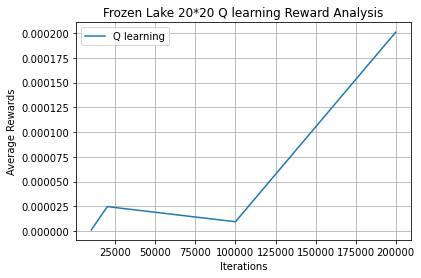

In [45]:
plt.plot(qlearning_mean_reward['iterations'],qlearning_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 Q learning Reward Analysis')
plt.grid()
plt.legend()

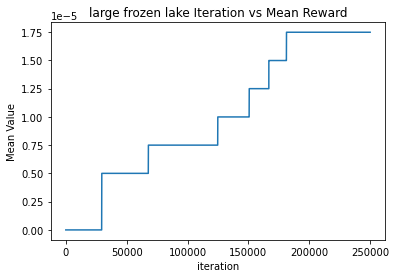

In [98]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.999, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "large frozen lake Iteration vs Mean Reward", figure_size=(6,4))

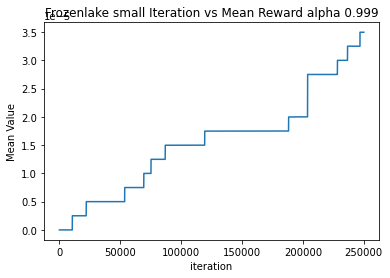

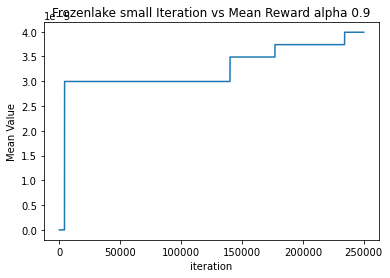

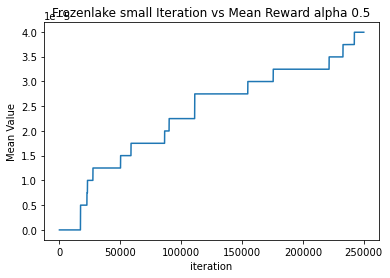

In [99]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.8,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.5,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha 0.5", figure_size=(6,4))


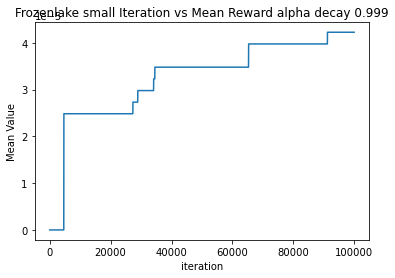

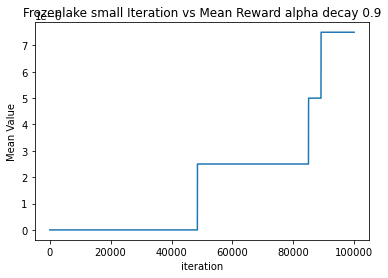

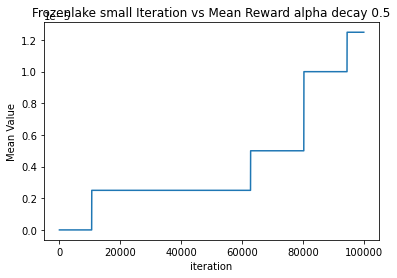

In [93]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha decay 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha decay 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.5, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward alpha decay 0.5", figure_size=(6,4))


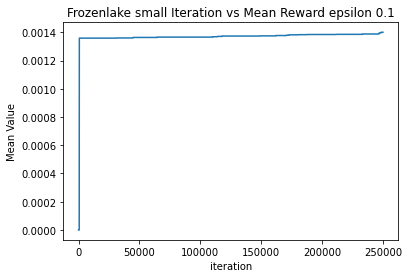

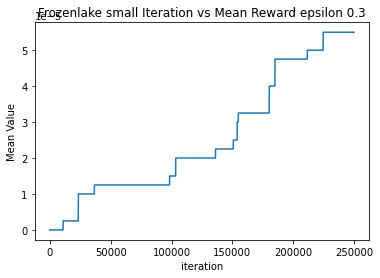

In [97]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.999, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward epsilon 0.1", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.3,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=250000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Frozenlake small Iteration vs Mean Reward epsilon 0.3", figure_size=(6,4))


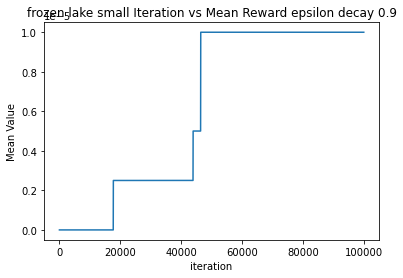

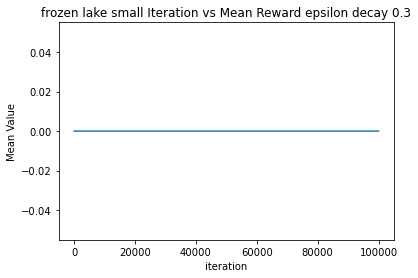

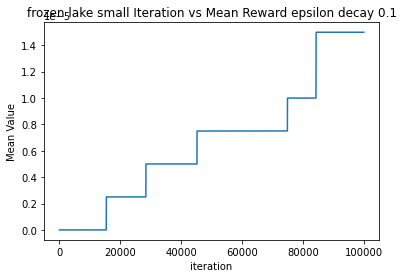

In [95]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "frozen lake small Iteration vs Mean Reward epsilon decay 0.9", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.3, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "frozen lake small Iteration vs Mean Reward epsilon decay 0.3", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P_fl, R_fl, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.1, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "frozen lake small Iteration vs Mean Reward epsilon decay 0.1", figure_size=(6,4))


In [46]:
## value iteration tuning on epsilons
def valueIteration(t, r, gammas, epsilons, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)*len(epsilons)), columns=columns)
    
    print('Gamma,\tEps,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for e in epsilons:
            test = ValueIteration(t, r, gamma=g, epsilon=e, max_iter=max_iterations)
            
            runs  = test.run()
            Time  = runs[-1]['Time']
            iters = runs[-1]['Iteration']
            maxR  = runs[-1]['Max V']
            meanR = runs[-1]['Mean V']
            
            max_rewards, mean_rewards, errors = [], [], []
            for run in runs:
                max_rewards.append(run['Max V'])
                mean_rewards.append(run['Mean V'])
                errors.append(run['Error'])
            
            policy = np.array(test.policy)
            
            data['gamma'][testNum]        = g
            data['epsilon'][testNum]      = e
            data['time'][testNum]         = Time
            data['iterations'][testNum]   = iters
            data['reward'][testNum]       = maxR
            data['mean_reward'][testNum]  = meanR
            data['mean_rewards'][testNum] = {tuple(mean_rewards)}
            data['max_rewards'][testNum]  = {tuple(max_rewards)}
            data['error'][testNum]        = {tuple(errors)}
            data['policy'][testNum]       = {test.policy}
            
            print('%.2f,\t%.0E,\t%.2f,\t%d,\t%f' % (g, e, Time, iters, maxR))
            
            testNum = testNum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # See differences in policy
    policies = data['policy']
    
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [47]:
from hiive.mdptoolbox.mdp import ValueIteration

gammas   = [0.1, 0.3, 0.6, 0.8, 0.9, 0.9999999]
epsilons = [1e-2, 1e-3, 1e-8, 1e-12]
vi_data  = valueIteration(P_fl, R_fl, gammas, epsilons, showResults=False)


Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	2,	1.033333
0.10,	1E-03,	0.00,	3,	1.034444
0.10,	1E-08,	0.00,	7,	1.034483
0.10,	1E-12,	0.00,	11,	1.034483
0.30,	1E-02,	0.00,	4,	1.111000
0.30,	1E-03,	0.00,	5,	1.111100
0.30,	1E-08,	0.00,	13,	1.111111
0.30,	1E-12,	0.00,	19,	1.111111
0.60,	1E-02,	0.00,	6,	1.249920
0.60,	1E-03,	0.00,	9,	1.249999
0.60,	1E-08,	0.00,	28,	1.250000
0.60,	1E-12,	0.01,	45,	1.250000
0.80,	1E-02,	0.00,	10,	1.363634
0.80,	1E-03,	0.00,	17,	1.363636
0.80,	1E-08,	0.01,	63,	1.363636


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.80,	1E-12,	0.08,	102,	1.363636
0.90,	1E-02,	0.00,	19,	1.482412
0.90,	1E-03,	0.01,	35,	1.482677
0.90,	1E-08,	0.02,	130,	1.482698
0.90,	1E-12,	0.02,	208,	1.482698
1.00,	1E-02,	0.77,	6143,	1.704233
1.00,	1E-03,	0.88,	7303,	1.704233
1.00,	1E-08,	1.56,	13100,	1.704233
1.00,	1E-12,	1.86,	15340,	1.704233
Time taken: 5.46


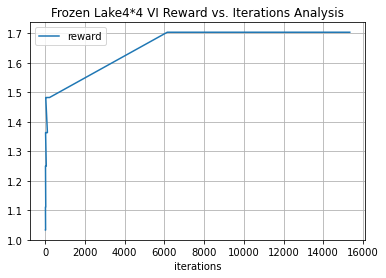

In [48]:
vi_data.plot(x='iterations', y='reward', title="Frozen Lake4*4 VI Reward vs. Iterations Analysis")
plt.grid(True)

In [49]:
vi_eps_mean_reward = pd.DataFrame(vi_data.groupby('epsilon')['mean_reward'].mean()).reset_index()
vi_eps_mean_reward

,epsilon,mean_reward
0,1.000000e-12,0.038684
1,1.000000e-08,0.038684
2,1.000000e-03,0.038659
3,1.000000e-02,0.038562


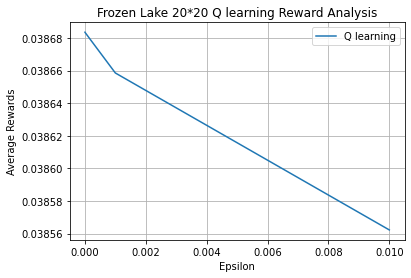

In [50]:
plt.plot(vi_eps_mean_reward['epsilon'],vi_eps_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Epsilon')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 20*20 Q learning Reward Analysis')
plt.grid()
plt.legend()

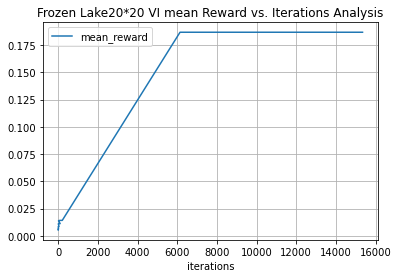

In [51]:
vi_data.plot(x='iterations', y='mean_reward', title="Frozen Lake20*20 VI mean Reward vs. Iterations Analysis")
plt.grid(True)

In [52]:
## policy iteration --hiive (with iter feature)
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def policyIteration(t, r, gammas, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)), columns=columns)
    
    print('gamma,\ttime,\titer,\treward')
    print(80*'_')
    
    testnum = 0
    for g in gammas:
        test = PolicyIteration(t, r, gamma=g, max_iter=max_iterations, eval_type="matrix") # eval_type="iterative"
        
        runs  = test.run()
        Time  = test.time
        iters = test.iter
        maxr  = runs[-1]['Max V']
        meanR = runs[-1]['Mean V']
                
        max_rewards, mean_rewards, errors = [], [], []
        for run in runs:
            max_rewards.append(run['Max V'])
            mean_rewards.append(run['Mean V'])
            errors.append(run['Error'])
        
        data['gamma'][testnum]        = g
        data['time'][testnum]         = Time
        data['iterations'][testnum]   = iters
        data['reward'][testnum]       = maxr
        data['mean_reward'][testnum]  = meanR
        data['mean_rewards'][testnum] = {tuple(mean_rewards)}
        data['max_rewards'][testnum]  = {tuple(max_rewards)}
        data['error'][testnum]        = {tuple(errors)}
        data['policy'][testnum]       = {test.policy}
        
        print('%.2f,\t%.2f,\t%d,\t%f' % (g, Time, iters, maxr))
        
        if showResults:
            plot_forest(policy, title)
            pass
        
        testnum = testnum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # see differences in policy
    policies = data['policy']
        
    # replace all nan's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [53]:

gammas   = [0.1, 0.3, 0.45, 0.6, 0.7, 0.8, 0.9, 0.9999999] 
pi_data  = policyIteration(P_fl, R_fl, gammas, showResults=False)


gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.06,	21,	1.034483
0.30,	0.05,	21,	1.111111
0.45,	0.05,	21,	1.176471


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.60,	0.05,	21,	1.250000
0.70,	0.05,	21,	1.304348
0.80,	281.22,	100000,	1.363636
0.90,	308.36,	100000,	1.482698
1.00,	315.65,	100000,	1.704233
Time taken: 905.56


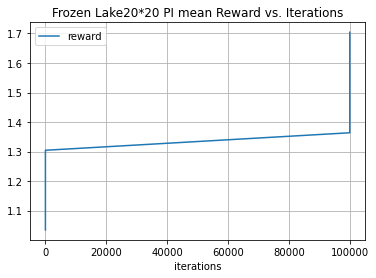

In [54]:
pi_data.plot(x='iterations', y='reward', title="Frozen Lake20*20 PI mean Reward vs. Iterations")
plt.grid(True)

In [88]:
# find the highest score for pi
bestRun_pi = pi_data['reward'].max()
print('best reward: %d' % bestRun_pi)
# find the highest score for vi
bestRun_vi = vi_data['reward'].max()
print('best reward: %d' % bestRun_vi)
# find the highest score for ql
bestRun_ql = ql_data['reward'].max()
print('best reward: %d' % bestRun_ql)

best reward: 1
best reward: 1
best reward: 0
